<a href="https://colab.research.google.com/github/jvribeirocostard/proje/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final**

---


## **Projeto Integrado**

---



### **Integrantes**
Gabriel Arai

João Vitor

José Vitor

Paulo Renato

---





# **Introdução**
  O nosso plano de negócio será relacionado sobre *churn*, que nada mais é
uma métrica que indica o quanto sua empresa perdeu seus clientes ou receita, por exemplo em serviços como Netflix e Spotify, ela representaria cancelamento de assinaturas. Ela é de extrema importância para identificar pontenciais cancelamento ao longo do tempo com antecedência, e reter que o churn não aumente, e sim diminue.

Nisso, iremos identificar quais *features* que levam a contribuir o churn, realizando uma análise exploratória do dataset escolhido, fazer limpeza de dados e pré-processamento, assim eventualmente trabalhar com os modelos, que irá fazer a previsão dos clientes, fazendo uma conclusão de qual algoritmo tem a melhor perfomance dentro do contexto.

---






# 1.  Biblioteca e Utilidades


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#2. Dataset

O dataset inclui informações sobre:


*   **Clientes que saíram no último mês -** a coluna é chamada de Churn value  (variável target)
*   **Serviços que cada cliente assinou -** telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes
*   **Informações da conta do cliente -** há quanto tempo ele é cliente da empresa
*   **Dados demográficos -** sexo, faixa etária e se têm parceiros ou não
*   **Informações relacionadas à localização -** cidade, código postal e coordenadas de latitude e longitude






In [ ]:
df = pd.read_csv('Telco_customer_churn.csv', sep=",")
df

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Monthly Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,53.85,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,70.70,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,21.15,0
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,84.80,0
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.20,0
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,29.60,0


##**Dicionário**

---
### Dados demográficos

---

Gender: O gênero do cliente: Masculino ou Feminino.

Senior Citizen: Indica se a pessoa é idosa: Sim ou Não.

Partner: Indica se o cliente tem um parceiro: Sim ou Não.

Depedents: Indica se o cliente mora com algum dependente: Sim ou Não. (Os dependentes podem ser filhos, pais, avós, etc).

---

### Localização

---

City: A cidade da residência principal do cliente.

Zip Code: O código postal da residência principal do cliente.

Latitude: A latitude da residência principal do cliente.

Longitude: A longitude da residência principal do cliente.

---

### Serviços

---

Tenure Months: Indica a quantidade total de meses que o cliente está com a empresa até o final do trimestre especificado acima.

Phone Service: Indica se o cliente é assinante do serviço de telefone da empresa: Sim ou Não.

Multiple Lines: Indica se o cliente é assinante de várias linhas telefônicas da empresa: Sim ou Não.

Internet Service: Indica se o cliente é assinante do serviço de Internet da empresa: Não, DSL, Fibra Óptica, Cabo.

Online Security: Indica se o cliente assina um serviço de segurança online adicional fornecido pela empresa: Sim ou Não.

Online Backup: Indica se o cliente assina um serviço de Backup online adicional fornecido pela empresa: Sim ou Não.

Device Protection: Indica se o cliente assina um plano de proteção de dispositivo adicional para seu equipamento de Internet fornecido pela empresa: Sim ou Não.

Tech Support: Indica se o cliente assina um plano adicional de suporte técnico da empresa com tempos de espera reduzidos: Sim ou Não.

Streaming TV: Indica se o cliente usa seu serviço de Internet para transmitir programas de televisão de um provedor terceirizado: Sim ou Não. (A empresa não cobra taxa adicional por esse serviço).

Streaming Movies: Indica se o cliente usa seu serviço de Internet para transmitir filmes de um provedor terceirizado: Sim ou Não. (A empresa não cobra taxa adicional por esse serviço).

Monthly Charges: Indica a cobrança mensal total atual do cliente por todos os seus serviços da empresa.

---
### Status
---
Churn Value: 1 = o cliente deixou a empresa neste trimestre. 0 = o cliente permaneceu na empresa.


In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    info = pd.DataFrame(df.dtypes,columns=['dtypes'])
    info = info.reset_index()
    info['Name'] = info['index']
    info = info[['Name','dtypes']]
    info['Missing'] = df.isnull().sum().values
    info['Uniques'] = df.nunique().values
    return info

resumetable(df)

Dataset Shape: (7043, 20)


,Name,dtypes,Missing,Uniques
0,City,object,0,1129
1,Zip Code,int64,0,1652
2,Latitude,float64,0,1652
3,Longitude,float64,0,1651
4,Gender,object,0,2
5,Senior Citizen,object,0,2
6,Partner,object,0,2
7,Dependents,object,0,2
8,Tenure Months,int64,0,73
9,Phone Service,object,0,2


#3. Exploratory Data Analysis (EDA)

Aqui nessa seção, o interesse é entender como os atributos se relacionam com o Churn Value

### **Total de Churn**

Total de clientes que fizeram churn ou não.

<BarContainer object of 2 artists>

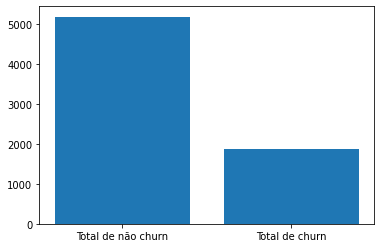

In [ ]:
valores_churn = df['Churn Value'].value_counts()
legendas_churn = ['Total de não churn','Total de churn']
plt.bar(legendas_churn, valores_churn )

### **Gêneros**

Taxa de churn dos clientes do sexo feminino.

<BarContainer object of 2 artists>

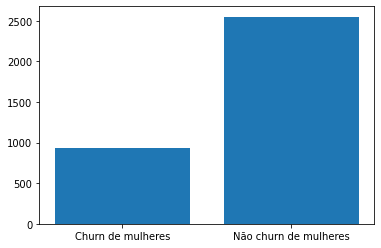

In [ ]:
df1 = df[['Gender', 'Churn Value']]
df2 = df1.loc[df['Gender']=='Female']
df6 = df2.loc[df['Churn Value']==1]
df7 = df2.loc[df['Churn Value']==0]
churn_mulheres = len(df6)
nao_churn_mulheres = len(df7)
legendas_churn = ['Churn de mulheres', 'Não churn de mulheres']
valores_churn_mulher = [churn_mulheres, nao_churn_mulheres]
plt.bar(legendas_churn, valores_churn_mulher)



---


Taxa de Churn dos clientes do sexo masculino.




<BarContainer object of 2 artists>

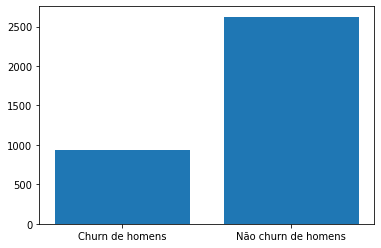

In [ ]:
df1 = df[['Gender', 'Churn Value']]
df2 = df1.loc[df['Gender']=='Male']
df3 = df2.loc[df['Churn Value']==1]
df4 = df2.loc[df['Churn Value']==0]
churn_homens = len(df3)
nao_churn_homens = len(df4)
valores_churn = [churn_homens, nao_churn_homens]
legendas_churn = ['Churn de homens', 'Não churn de homens']
plt.bar(legendas_churn, valores_churn)



---



## **Serviço**

Nessa subseção, iremos visualizar os totais de clientes que usam os serviços da empresa, e logo em seguida fazer análise se fizeram churn ou não em cada atributos.


---



*        Phone Service / Serviço Telefônica

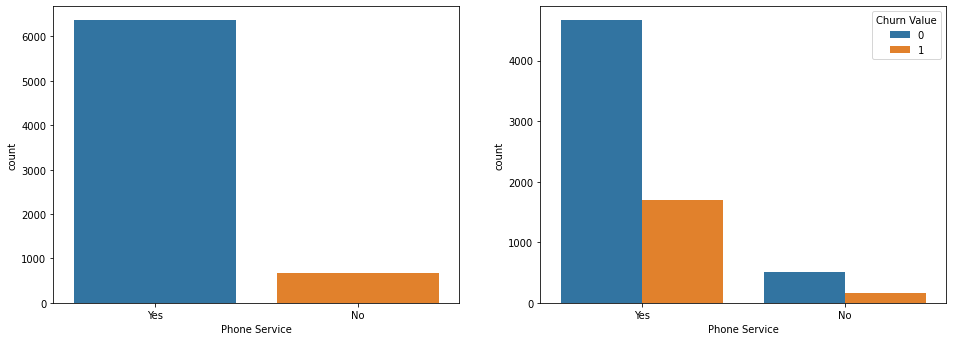

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Phone Service'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Phone Service'], hue = df['Churn Value'],data = df)



---

* Multiple Lines / Linhas Múltiplas

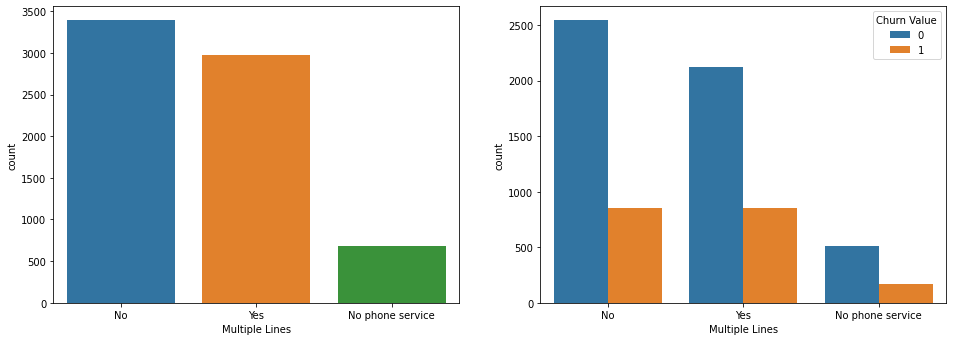

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Multiple Lines'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Multiple Lines'], hue = df['Churn Value'],data = df)




---

*   Internet Service / Serviço de Internet




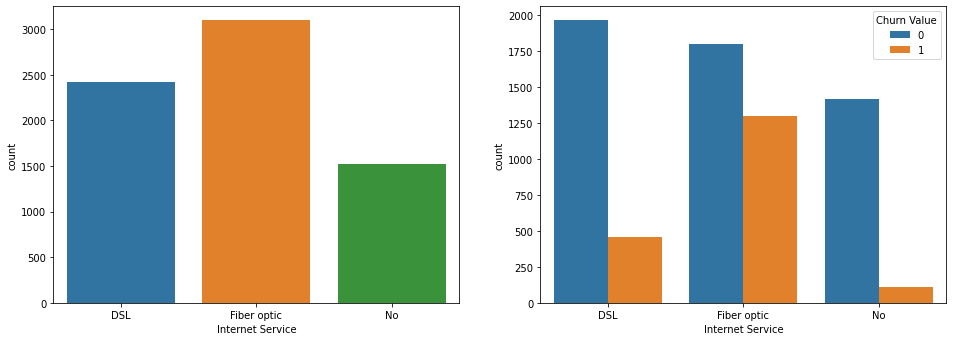

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Internet Service'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Internet Service'], hue = df['Churn Value'],data = df)




---

*   Online Security / Segurança Online

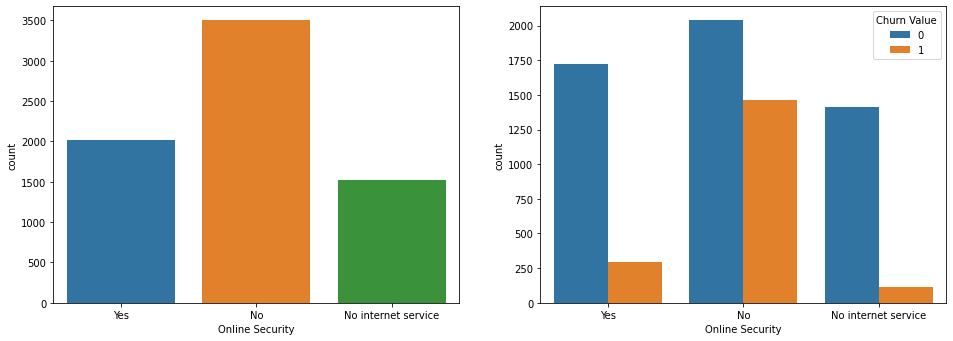

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Online Security'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Online Security'], hue = df['Churn Value'],data = df)



---


* Online Backup

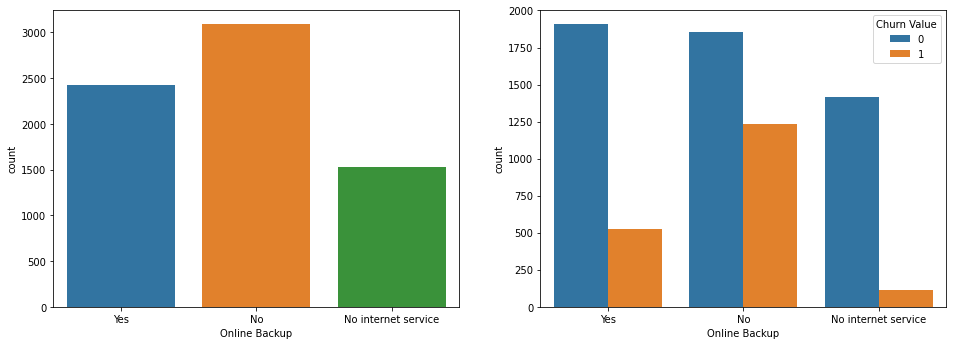

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Online Backup'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Online Backup'], hue = df['Churn Value'],data = df)




---

* Device Protection / Proteção de Dispositivo

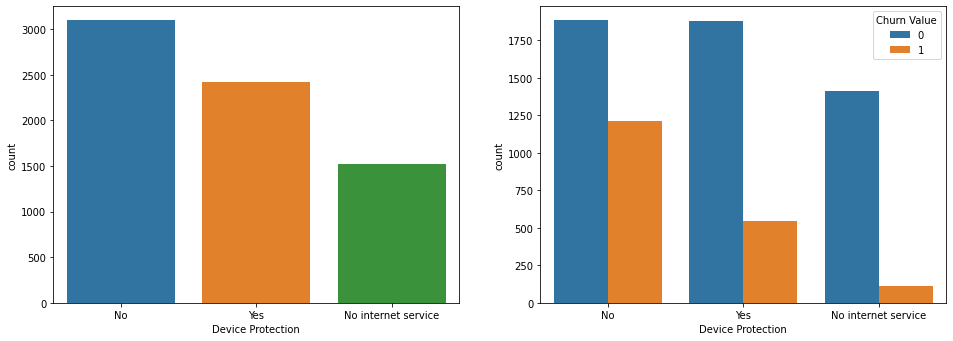

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Device Protection'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Device Protection'], hue = df['Churn Value'],data = df)




---
* Tech Support / Suporte Técnico


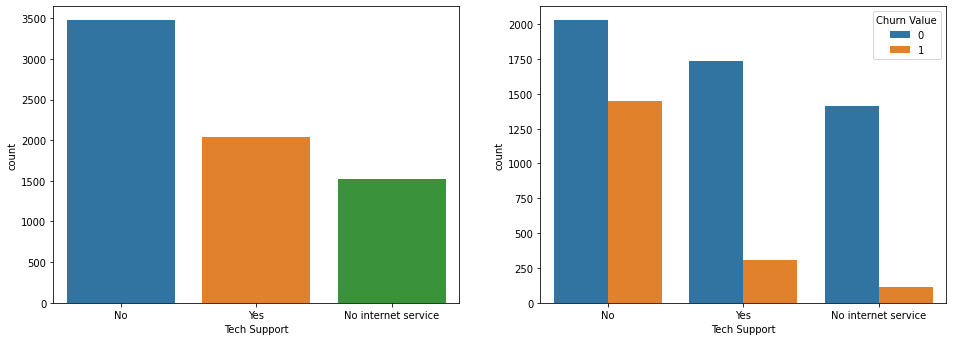

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Tech Support'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Tech Support'], hue = df['Churn Value'],data = df)



---

* Streaming TV

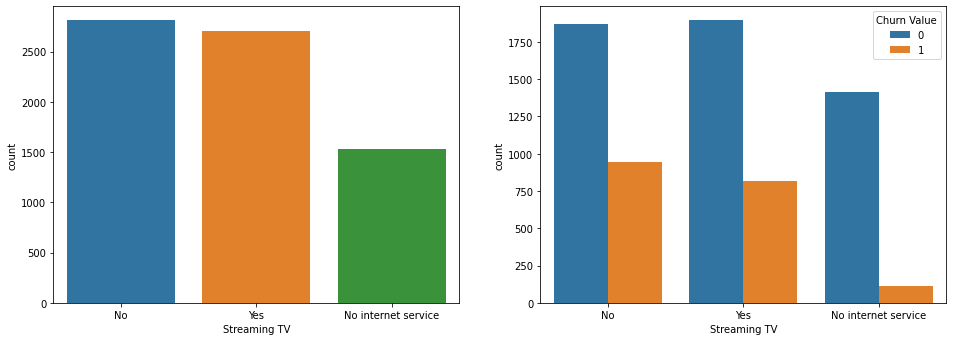

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Streaming TV'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Streaming TV'], hue = df['Churn Value'],data = df)



---

* Streaming Movies / Filmes

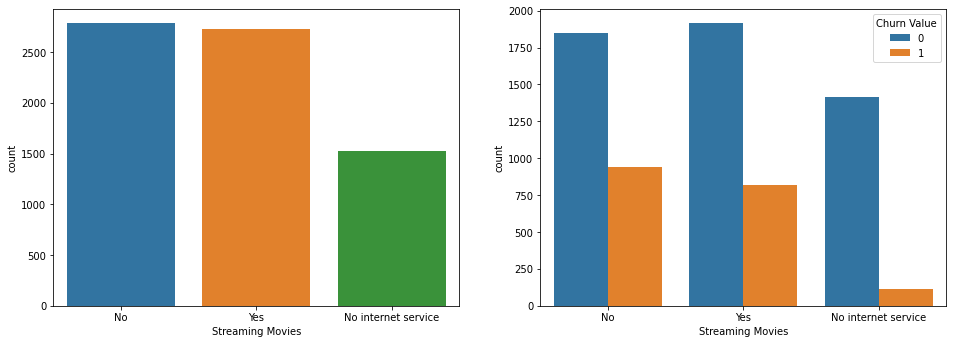

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.countplot(x=df['Streaming Movies'], data=df,color=None)

plt.subplot(222)
g1 = sns.countplot(x=df['Streaming Movies'], hue = df['Churn Value'],data = df)

## **Localização**

In [ ]:
df1 = df[['City', 'Churn Value']]
df2 = df1.loc[df['Churn Value']==0]
df2.value_counts().sort_values()


City           Churn Value
Acampo         0                1
Grizzly Flats  0                1
Grimes         0                1
Lewiston       0                1
Ludlow         0                1
                             ... 
San Francisco  0               73
Sacramento     0               82
San Jose       0               83
San Diego      0              100
Los Angeles    0              215
Length: 1117, dtype: int64

In [ ]:
df1 = df[['City', 'Churn Value']]
df2 = df1.loc[df['Churn Value']==1]
df2.value_counts().sort_values()

City           Churn Value
Los Altos      1               1
Campbell       1               1
Denair         1               1
Camino         1               1
Beale Afb      1               1
                              ..
Sacramento     1              26
San Jose       1              29
San Francisco  1              31
San Diego      1              50
Los Angeles    1              90
Length: 833, dtype: int64



---








# 4.   Pré-processamento de Dados






Nessa seção vamos realizar alguns procedimentos a serem tomados, não foi necessário fazer limpeza, precisando somente eliminar algumas colunas que são muitos únicas, transformando os dados categóricos em numéricos para podermos trabalhar com os modelos.

In [ ]:
df = df.replace({'No internet service': 0, 'No phone service': 0, 'Fiber optic': 1, 'DSL': 1, 'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})
df = df.drop(['Monthly Charges','City','Zip Code','Latitude','Longitude'], axis=1)
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Churn Value
0,0,0,0,0,2,1,0,1,1,1,0,0,0,0,1
1,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1
2,1,0,0,1,8,1,1,1,0,0,1,0,1,1,1
3,1,0,1,1,28,1,1,1,0,0,1,1,1,1,1
4,0,0,0,1,49,1,1,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,72,1,0,0,0,0,0,0,0,0,0
7039,0,0,1,1,24,1,1,1,1,0,1,1,1,1,0
7040,1,0,1,1,72,1,1,1,0,1,1,0,1,1,0
7041,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0


In [ ]:
config = dict(method='zip',
                        archive_name='churn.csv')

In [ ]:
df.to_csv('churn_final.zip', index=False,
          compression=config)

# 5. Modelos

## SVM (Support Vector Machine)


In [ ]:
# Atributos a serem considerados
X = np.array(df.drop('Churn Value',1))
X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

In [ ]:
# Classificação do Churn
y = np.array(df['Churn Value'])
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Separando os X's e Y's para teste e treino (30% dos dados serão utilizados para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
# Algoritmo SVM
svm = svm.SVC(C=1.0)

In [ ]:
# Normalização dos valores X_train e y_train com a função 'fit()'
svm.fit(X_train, y_train)

SVC()

In [ ]:
# y_pred = valores preditos
y_pred = svm.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# y_test = valores testados
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1584
           1       0.56      0.41      0.47       529

    accuracy                           0.77      2113
   macro avg       0.69      0.65      0.66      2113
weighted avg       0.75      0.77      0.76      2113



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


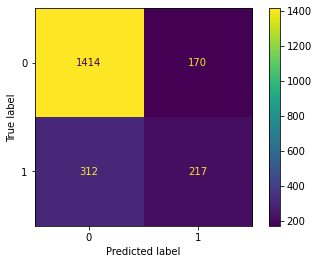

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svm, X_test, y_test)

In [ ]:
arq_svm = 'SVM_Churn.sav'
joblib.dump(svm,arq_svm)

['SVM_Churn.sav']

In [ ]:
svm_carregado = joblib.load(arq_svm)
resultado = svm_carregado.score(X_test, y_test)
print(resultado)

0.7718883104590629


## Árvore de Decisão

In [ ]:
# Algoritmo da árvore de decisão
arv = tree.DecisionTreeClassifier()

In [ ]:
arv.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# y_pred = valores preditos
y_pred = arv.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# y_test = valores testados
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1584
           1       0.48      0.51      0.49       529

    accuracy                           0.74      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.74      0.74      0.74      2113



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


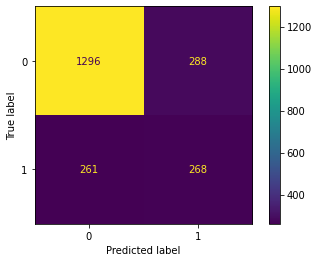

In [ ]:
plot_confusion_matrix(arv, X_test, y_test)

In [ ]:
arq_arv = 'ARV_Churn.sav'
joblib.dump(arv,arq_arv)

['ARV_Churn.sav']

In [ ]:
arv_carregado = joblib.load(arq_arv)
resultado = arv_carregado.score(X_test, y_test)
print(resultado)

0.7401798390913393


## K-Means

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(df)
inertias = []
mapping = []
K = range(1, 10)

for k in K:
    kmean = KMeans(n_clusters=k, n_init=12).fit(x)
    kmean.fit(x)
    inertias.append(kmean.inertia_)
    mapping.append(k)



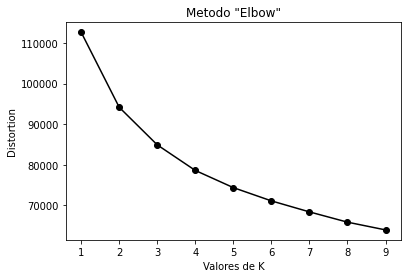

In [ ]:
plt.plot(K, inertias, 'ko-')
plt.xlabel('Valores de K')
plt.ylabel('Distortion')
plt.title('Metodo "Elbow"')
plt.show()

In [ ]:
k = KMeans(n_clusters = 5)
pred = k.fit_predict(x)

In [ ]:
df['Grupo'] = pred
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Churn Value,clusters,Grupo
0,0,0,0,0,2,1,0,1,1,1,0,0,0,0,1,3,0
1,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,3,0
2,1,0,0,1,8,1,1,1,0,0,1,0,1,1,1,3,0
3,1,0,1,1,28,1,1,1,0,0,1,1,1,1,1,2,3
4,0,0,0,1,49,1,1,1,0,1,1,0,1,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,72,1,0,0,0,0,0,0,0,0,0,0,2
7039,0,0,1,1,24,1,1,1,1,0,1,1,1,1,0,1,3
7040,1,0,1,1,72,1,1,1,0,1,1,0,1,1,0,0,3
7041,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,3,1


In [ ]:
df.groupby(['Grupo']).mean()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Churn Value,clusters
Grupo,,,,,,,,,,,,,,,,
0,0.496457,0.000000,0.279641,0.127067,16.136042,1.0,0.365139,1.000000,0.200283,0.243269,0.222012,0.191781,0.311762,0.313179,0.460085,2.422296
1,0.485337,0.152493,0.456012,0.230205,31.737537,0.0,0.000000,1.000000,0.414956,0.420821,0.447214,0.423754,0.417889,0.436950,0.249267,2.061584
2,0.490874,0.030639,0.488266,0.375489,30.730769,1.0,0.224902,0.008475,0.000652,0.000000,0.000000,0.000000,0.000000,0.000000,0.070404,2.024772
3,0.496017,0.087095,0.736059,0.313330,54.656399,1.0,0.713224,1.000000,0.615507,0.712161,0.724907,0.654806,0.726500,0.721190,0.100903,1.330855
4,0.506651,1.000000,0.440145,0.042322,26.754534,1.0,0.616687,0.993954,0.183797,0.345828,0.340992,0.140266,0.476421,0.499395,0.516324,2.287787


# 6. Conclusão

O trabalho determinou os modelos SVM e Árvore de Decisão com acurácia acima do esperado, ambos acerca de 74%, porém foi encontrado valores baixos na precisão, recall e f-1 score na classe ``` 1 ``` do churn value, o que seria uma certa limitação para possuir uma alta perfomance de prever os dados de treinamento, na confusão de matriz foi observado que a predição correta se concentra na classe ```0``` do churn value e também utilizamos a técnica de KMeans, para fazer análise do centróide de cada grupo, que nesse caso escolhemos 5 clusters para entender a média dentre eles.

As possíveis melhorias foram pensada da seguinte forma:
1. Melhorar o agrupamento de dados que provavelmente melhoraria o resultado dos
modelos.
2. Utilizar alguma técnica de afinar os dados para obter os modelos mais ajustado ao nosso objetivo de negócio.
3. Encontrar novas maneiras de explorar os dados categóricos.

